###1) Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.



In [ ]:
from numpy import *

In [ ]:
datasetCSV = 'https://gist.githubusercontent.com/AramisAraujo/0009d230ee2f9d2199d30663b314ff88/raw/f498619e16a5ebd1b292c554c072e3e7af300f54/CDP%2520regress%25C3%25A3o.csv'


In [ ]:
def run():
  points = genfromtxt(datasetCSV, delimiter=',')
  #Hyperparameters
  
  
  #how fast the model learns
  learningRate = 0.0001
  
  # y = mx + b (slope formula)
  initialB = 0
  initialM = 0
  
  #How many training step iterations
  numIterations = 1000
  
  [b, m] = gradientDescentRunner(points, initialB, initialM, learningRate, numIterations)
  
  print(b)
  print(m)

In [ ]:
def gradientDescentRunner(points, startingB, startingM, learningRate, numIterations):
  # y = Mx + B
  b = startingB
  m = startingM
  
  for i in range(numIterations): 
    b, m = stepGradient(b, m, array(points), learningRate)
    
  return [b, m]
  

In [ ]:
def stepGradient(bCurrent, mCurrent, points, learningRate):
  #Gradient descent
  
  bGradient = 0
  mGradient = 0
  
  N = float(len(points))
  
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    
    bGradient += -(2/N) * (y - ((mCurrent *x) + bCurrent))
    mGradient += -(2/N) * x * (y - ((mCurrent * x) + bCurrent))
    
  newB = bCurrent - (learningRate * bGradient)
  newM = mCurrent - (learningRate * mGradient)
  
  return [newB, newM]

In [ ]:
def computeErrorForGivenPoints(b, m, points):
  totalError = 0
  
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    
    totalError += (y - (m * x + b)) ** 2
    
  return totalError / float(len(points))

In [ ]:
run()

-0.18234255376510086
3.262182267596014


###2) Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS por interação.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline


In [ ]:
def runShowRSS():
  points = genfromtxt(datasetCSV, delimiter=',')
  #Hyperparameters
  
  
  #how fast the model learns
  learningRate = 0.0001
  
  # y = mx + b (slope formula)
  initialB = 0
  initialM = 0
  
  #How many training step iterations
  numIterations = 1000
  
  [b, m], errors = gradientDescentRunnerRSS(points, initialB, initialM, learningRate, numIterations)
  
  print(b)
  print(m)
  return errors

In [ ]:
def gradientDescentRunnerRSS(points, startingB, startingM, learningRate, numIterations):
  # y = Mx + B
  b = startingB
  m = startingM
  

  errors = []
  for i in range(numIterations): 
    b, m = stepGradient(b, m, array(points), learningRate)
    errors.append(computeErrorForGivenPoints(b, m, points))
    
  rss = pd.DataFrame()
  rss['Error'] = errors
  
  return [b, m], rss

In [ ]:
errors = runShowRSS()

-0.18234255376510086
3.262182267596014


In [ ]:
display(errors)

,Error
0,2648.238127
1,2381.173593
2,2142.151014
3,1928.225950
4,1736.763131
5,1565.403995
6,1412.037629
7,1274.774770
8,1151.924531
9,1041.973568


Text(0, 0.5, 'Error')

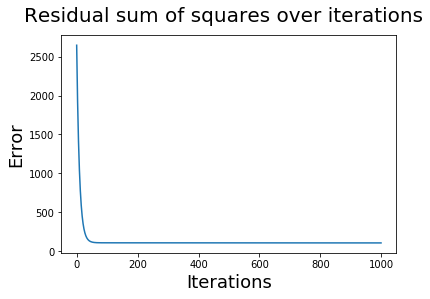

In [ ]:
figRSS = plt.figure()
plt.plot(errors['Error'])
figRSS.suptitle('Residual sum of squares over iterations', fontsize=20)
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Error', fontsize=18)

###3) O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?



Para os parâmetros learningRate = 0.001 e iterations = 1000, é possível notar o rápido decaimento do RSS. Isto se deu pela adequação dos valores destes parâmetros aos dados e sua distribuição. Nota-se também que a taxa de aprendizado influencia diretamente no decaimento do erro.

###4) Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.



In [ ]:
def runParams(learningRate, numIterations):
  points = genfromtxt(datasetCSV, delimiter=',')
  #Hyperparameters
  
  
  #how fast the model learns
  # learningRate = 0.0001
  
  # y = mx + b (slope formula)
  initialB = 0
  initialM = 0
  
  #How many training step iterations
  # numIterations = 1000
  
  [b, m] = gradientDescentRunner(points, initialB, initialM, learningRate, numIterations)
  
  print('w0: ' + str(b))
  print('w1: ' + str(m))
  print('error: ' + str(computeErrorForGivenPoints(b, m, points)))

In [ ]:
iterations = 100000
learningRate = 0.001

runParams(learningRate, iterations)
print('\nTarget:\nw0: -39.0\nw1: 5.0')

w0: -39.44332204413956
w1: 5.599308181295304
error: 29.82881660998503

Target:
w0: -39.0
w1: 5.0


####Pode-se observar que, experimentando apenas com o número de iterações, é possível atingir os valores esperados para w0 e w1. Neste caso, aumentando o número de iterações para 100000, e consequentemente a precisão do modelo, foi possível atingir estes valores.

###5) O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado ao tamanho do gradiente (como no algoritmo dos slides apresentados em sala). 



In [ ]:
def gradientDescentRunnerTol(points, startingB, startingM, learningRate, tolerance):
  # y = Mx + B
  b = startingB
  m = startingM
  
  iterations = 0
  while computeErrorForGivenPoints(b, m, points) >= tolerance:
    b, m = stepGradient(b, m, array(points), learningRate)
    iterations += 1

  print('iterations: ' + str(iterations))
  
  return [b, m]

In [ ]:
def runParamsTol(learningRate, tolerance):
  points = genfromtxt(datasetCSV, delimiter=',')
  #Hyperparameters : learningRate, tolerance
  
  
  # y = mx + b (slope formula)
  initialB = 0
  initialM = 0
  
  
  [b, m] = gradientDescentRunnerTol(points, initialB, initialM, learningRate, tolerance)
  
  print('w0: ' + str(b))
  print('w1: ' + str(m))

In [ ]:
learningRate = 0.001
tolerance = 30
runParamsTol(learningRate, tolerance)

iterations: 31975
w0: -37.55228160346146
w1: 5.4867384065436156


###6) Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?



In [ ]:
learningRate = 0.001
tolerance = 29.83
runParamsTol(learningRate, tolerance)

iterations: 58124
w0: -39.28875995068296
w1: 5.590107415583852


####Realizando diversos testes com o valor da tolerância, pude observar resultados similares aos obtidos no item 4 ao utilizar valores de tolerância próximos ao obtido para o erro calculado.

###7) Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [ ]:
def stepGradientNormal(bCurrent, mCurrent, points, learningRate):
  #Gradient descent normal, closed form
  
  bGradient = 0
  mGradient = 0

  mGradDivisor = 0
  mGradDivider = 0

  allFirst = lambda x: [a for (a,b) in x]
  allSecond = lambda x: [b for (a,b) in x]

  xMean = sum(allFirst(points)) / len(points)
  yMean = sum(allSecond(points)) / len(points)
  
  N = float(len(points))
  
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    
    mGradDivider += (x - xMean) * (y - yMean)
    mGradDivisor += (x - xMean) ** 2

  mGradient = 0 if mGradDivisor == 0 else mGradDivider / mGradDivisor

  bGradient = yMean - (mGradient * xMean) 
    
  newB = bCurrent - (learningRate * bGradient)
  newM = mCurrent - (learningRate * mGradient)
  
  return [newB, newM]

In [ ]:
def gradientDescentRunnerNormal(points, startingB, startingM, learningRate, numIterations):
  # y = Mx + B
  b = startingB
  m = startingM
  
  for i in range(numIterations): 
    b, m = stepGradientNormal(b, m, array(points), learningRate)
    
  return [b, m]

In [ ]:
def runStepNormal():
  points = genfromtxt(datasetCSV, delimiter=',')
  #Hyperparameters
  
  
  #how fast the model learns
  learningRate = 0.0001
  
  # y = mx + b (slope formula)
  initialB = 0
  initialM = 0
  
  #How many training step iterations
  numIterations = 10000
  
  [b, m] = gradientDescentRunnerNormal(points, initialB, initialM, learningRate, numIterations)
  
  print('w0: ' + str(b))
  print('w1: ' + str(m))

In [ ]:
import time

print('Running Normalized Coeficients Approach\n')
currentTime = time.time()

runStepNormal()
runStepNormalTime = time.time() - currentTime

learningRate = 0.001
tolerance = 29.83

print('\nRunning Tolerance Approach\n')
currentTime = time.time()
runParamsTol(learningRate, tolerance)

runParamsTolTime = time.time() - currentTime

print('\nNormalized Coeficients Approach time: ' + str(round(runStepNormalTime, 2))+ ' second(s)')
print('Tolerance Approach time: ' + str(round(runParamsTolTime, 2))+ ' second(s)')

Running Normalized Coeficients Approach

w0: 39.44625667909923
w1: -5.599482874120658

Running Tolerance Approach

iterations: 58124
w0: -39.28875995068296
w1: 5.590107415583852

Normalized Coeficients Approach time: 1.53 second(s)
Tolerance Approach time: 7.15 second(s)


####Utilizando as equações normais para estimativa dos coeficientes, pudemos obter um tempo de execução consideravelmente menor quando comparado com a abordagem que utiliza um valor de Tolerância para parada do algoritmo.